선형회귀는 기울기와 절편을 찾아준다

당뇨병 환자를 예측해보자!

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
pd.DataFrame(diabetes.data)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [6]:
diabetes.target[:3]

array([151.,  75., 141.])

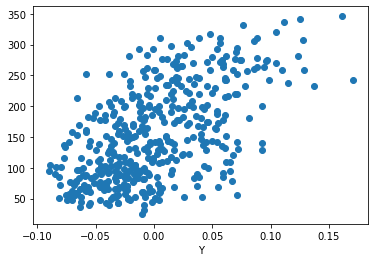

In [7]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.xlabel('Y')
plt.show()

훈련 데이터 준비

In [8]:
x = diabetes.data[:,2]
y = diabetes.target

예측값 : y_hat

y_hat = wx + b

In [9]:
# w 와 b 초기와
w = 1.0
b = 1.0

In [10]:
# 훈련 데이터의 첫번째 샘플로 y_hat 얻기
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [11]:
# 타깃과 예측 데이터 비교하기
print(y[0])

151.0


In [12]:
# w값 조정해서 예측값 바꾸기
'''w와 b를 조금씩 변경해서 y_hat의 증가량을 파악해보자'''
w_inc = w+0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


In [13]:
# w값 조정후 얼마나 변했는지 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [14]:
'''변화율(rate)가 0보다 크다면, w가 증가할때 y_hat도 증가한다'''
'''변화율이 0보다 작으면 w가 감소할때 y_hat이 증가한다'''
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [15]:
b_inc = b+0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

1.1616962065186887


In [16]:
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate)

1.0


In [17]:
b_new = b + 1
print(b_new)

2.0


오차역전파

In [18]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [19]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [20]:
# 전체 샘플 반복하기
for x_i, y_i in zip(x,y):
    y_hat = x_i*w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1*err
print(w,b)

587.8654539985689 99.40935564531424


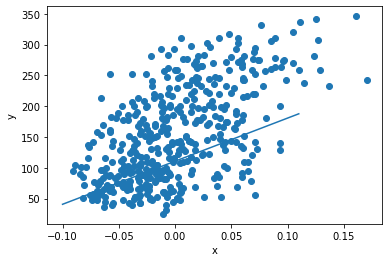

In [22]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.11, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
# 에포크 반복
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i*w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate*err
        b = b + 1*err
print(w,b)

913.5973364345905 123.39414383177204


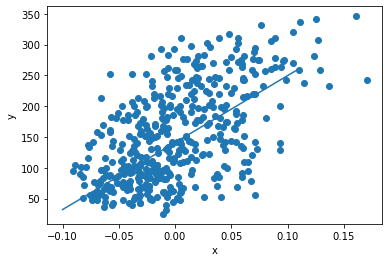

In [24]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.11, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
x_new = 0.18
y_pred = x_new*w + b
print(y_pred)

287.8416643899983


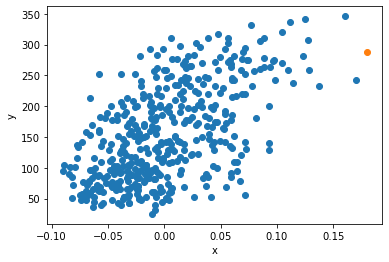

In [26]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()